## Make Prediction Using Logistic Regression

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
from preprocessing import PrepareData

In [10]:
ppd = PrepareData()
df, sales = ppd.get_train_data()
sale_price = df[['SalePrice']].values

In [11]:
df.drop(ppd.sales_attrs, axis=1, inplace=True)
# df.drop("SalePrice", axis=1, inplace=True)

In [12]:
values = df.values
y = sale_price.reshape(-1, 1)

# split into train and test sets
n_train_time = int(len(y)*0.9)
train_x = values[:n_train_time, :]
train_y = y[:n_train_time]
test_x = values[n_train_time:, :]
test_y = y[n_train_time:]

In [13]:
lr = linear_model.LinearRegression()
model = lr.fit(train_x, train_y)

In [14]:
predictions = model.predict(test_x)
actual_values = test_y


R^2 is: 0.8800606546598455
RMSE is: 0.0012116830912538097


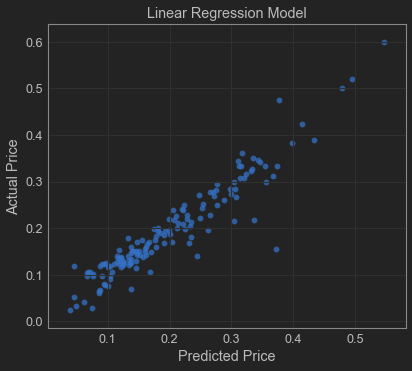

In [15]:
print "\nR^2 is:", model.score(test_x, test_y)
print 'RMSE is:', mean_squared_error(test_y , predictions)

plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [17]:
test_df, test_ids = ppd.get_test_data()

In [43]:
def convert_to_price(sales, predict_results):
    max_s = sales.SalePrice.max()
    min_s = sales.SalePrice.min()
    predicted_p = predict_results*(max_s - min_s) + min_s
    return predicted_p

In [48]:
predict_results = model.predict(test_df)

In [66]:
price = convert_to_price(sales, predict_results)

In [67]:
test_ids['SalePrice'] = price.transpose()[0]

In [69]:
price

array([[138070.46788069],
       [175265.27286838],
       [200380.14534197],
       ...,
       [204070.57264847],
       [123941.73674398],
       [252806.82455131]])

In [70]:
test_ids.to_csv("submission.csv", index=False)